In [307]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate


In [308]:
#Load data
df = pd.read_csv("C:\\Users\\phnth\\Downloads\\hulutv.csv")


In [309]:
#Explore data
df.shape 

(2398, 15)

In [310]:
#Explore data
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20475,Saturday Night Live,SHOW,A late-night live television sketch comedy and...,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,tt0072562,8.0,47910.0,54.345,6.9
1,ts20413,M*A*S*H,SHOW,The 4077th Mobile Army Surgical Hospital is st...,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,tt0068098,8.4,55882.0,27.308,8.0
2,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,tt0043208,8.5,25944.0,17.088,8.1
3,ts20669,Taxi,SHOW,"Louie De Palma is a cantankerous, acerbic taxi...",1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,tt0077089,7.7,13379.0,14.346,7.3
4,ts21049,The Mary Tyler Moore Show,SHOW,30-year-old single Mary Richards moves to Minn...,1970,TV-PG,28,['comedy'],['US'],7.0,tt0065314,8.2,8692.0,9.290,7.5


In [311]:
#Explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2398 non-null   object 
 1   title                 2398 non-null   object 
 2   type                  2398 non-null   object 
 3   description           2385 non-null   object 
 4   release_year          2398 non-null   int64  
 5   age_certification     1713 non-null   object 
 6   runtime               2398 non-null   int64  
 7   genres                2398 non-null   object 
 8   production_countries  2398 non-null   object 
 9   seasons               1330 non-null   float64
 10  imdb_id               2263 non-null   object 
 11  imdb_score            2232 non-null   float64
 12  imdb_votes            2231 non-null   float64
 13  tmdb_popularity       2348 non-null   float64
 14  tmdb_score            2238 non-null   float64
dtypes: float64(5), int64(

In [312]:
#Clean the data
#Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


id                         0
title                      0
type                       0
description               13
release_year               0
age_certification        685
runtime                    0
genres                     0
production_countries       0
seasons                 1068
imdb_id                  135
imdb_score               166
imdb_votes               167
tmdb_popularity           50
tmdb_score               160
dtype: int64

In [313]:
def missing_values_table(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100*df.isnull().sum() / len(df)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values' , 1:'% of Total Values'})
  return mis_val_table_ren_columns.round(1)
missing_values_table(df)

,Missing Values,% of Total Values
id,0,0.0
title,0,0.0
type,0,0.0
description,13,0.5
release_year,0,0.0
age_certification,685,28.6
runtime,0,0.0
genres,0,0.0
production_countries,0,0.0
seasons,1068,44.5


In [314]:
#Drop the null values
null = ['description','imdb_score', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
df.dropna(subset=null , inplace=True)

In [315]:
#Deal with "seasons"
null_season_rows = df[df['seasons'].isnull()]
null_season_rows


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9,tm147043,The Lorax,MOVIE,"The Once-ler, a ruined industrialist, tells th...",1972,PG,25,"['comedy', 'animation', 'drama', 'family', 'fa...",['US'],NaN,tt0213065,7.9,2932.0,8.834,7.2
12,tm1236,A Boy Named Charlie Brown,MOVIE,"Poor Charlie Brown. He can't fly a kite, and h...",1969,G,86,"['animation', 'comedy', 'family', 'drama']",['US'],NaN,tt0064107,7.3,5001.0,8.118,6.9
13,tm156894,"Snoopy, Come Home",MOVIE,When Snoopy receives a letter from his origina...,1972,G,81,"['animation', 'drama', 'family', 'music', 'com...",['US'],NaN,tt0069289,7.4,4665.0,6.630,6.9
14,tm11186,The Cat in the Hat,MOVIE,In a marvelously animated version of one of th...,1971,NaN,25,"['family', 'animation', 'comedy', 'fantasy']",['US'],NaN,tt0284714,7.3,1921.0,2.979,6.7
15,tm189299,Dr. Seuss on the Loose,MOVIE,"The pressure to conform, the inevitability of ...",1973,NaN,25,"['family', 'animation', 'comedy']",[],NaN,tt0134628,7.7,632.0,4.353,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,tm1108139,Sanak,MOVIE,"Set in Mumbai, the story unfolds in a hospital...",2021,NaN,117,"['action', 'thriller']",['IN'],NaN,tt13912632,6.7,8904.0,1.745,6.4
2377,tm896043,Jacinta,MOVIE,An astonishing record of the hereditary nature...,2021,NaN,105,['documentation'],['US'],NaN,tt11514252,7.4,300.0,3.200,8.0
2383,tm975258,Felix and the Treasure of Morgäa,MOVIE,Taking advantage of his mother's absence as sh...,2021,PG,85,"['animation', 'family', 'fantasy']",['CA'],NaN,tt11231280,5.5,332.0,5.820,5.7
2384,tm879030,Cupid for Christmas,MOVIE,Hoping to land a promotion and become the new ...,2021,PG,87,"['fantasy', 'romance', 'comedy']",[],NaN,tt11877948,5.5,150.0,1.712,6.0


We can see that only type "MOVIE" has null value in "seasons"

In [316]:
#Deal with "seasons"
df['seasons'].fillna(0, inplace=True)

In [317]:
#Deal with "age certification"
df.drop(['age_certification'], axis=1,inplace=True)


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 0 to 2393
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2106 non-null   object 
 1   title                 2106 non-null   object 
 2   type                  2106 non-null   object 
 3   description           2106 non-null   object 
 4   release_year          2106 non-null   int64  
 5   runtime               2106 non-null   int64  
 6   genres                2106 non-null   object 
 7   production_countries  2106 non-null   object 
 8   seasons               2106 non-null   float64
 9   imdb_id               2106 non-null   object 
 10  imdb_score            2106 non-null   float64
 11  imdb_votes            2106 non-null   float64
 12  tmdb_popularity       2106 non-null   float64
 13  tmdb_score            2106 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 246.8+ KB


In [319]:

df.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [320]:
#Check for Duplicates
df.duplicated().sum()


0

C:\Users\phnth\AppData\Local\Temp\ipykernel_3600\4071603465.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde = False)


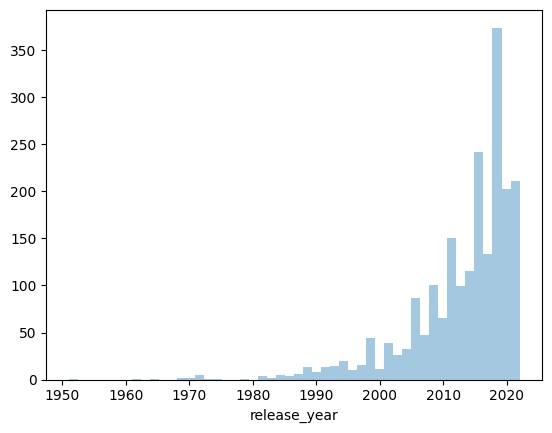

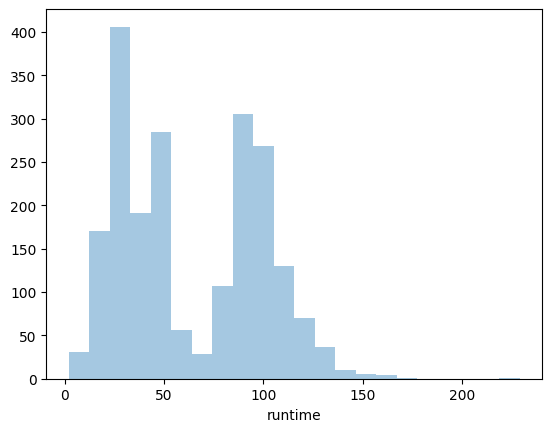

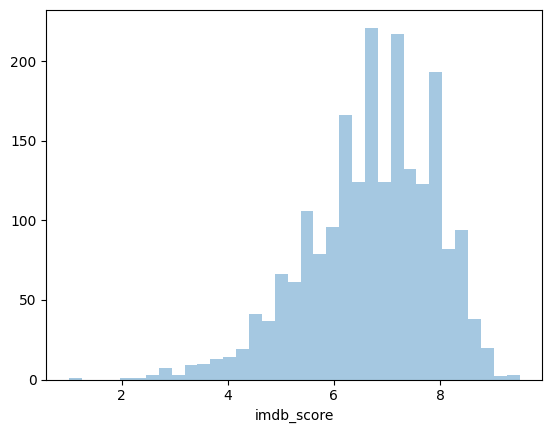

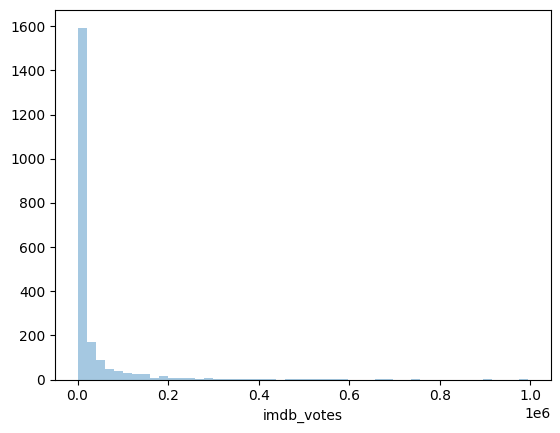

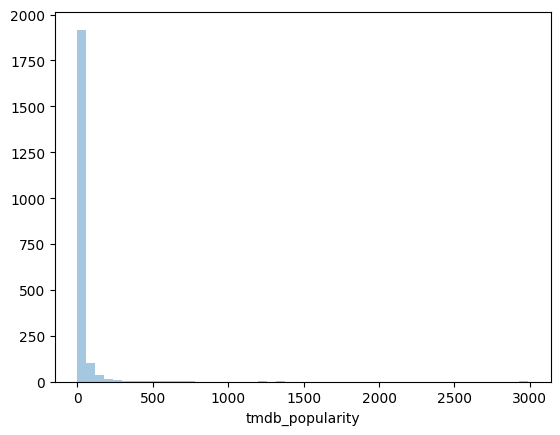

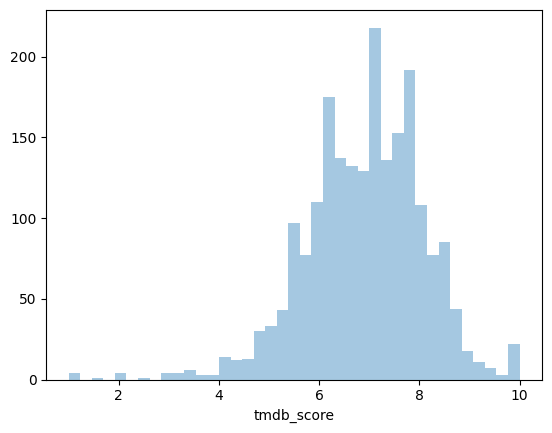

In [321]:
#EDA
features = ['release_year','runtime', 'imdb_score','imdb_votes', 'tmdb_popularity','tmdb_score']
for feat in features:
    plt.figure()
    sns.distplot(df[feat], kde = False)

<AxesSubplot: >

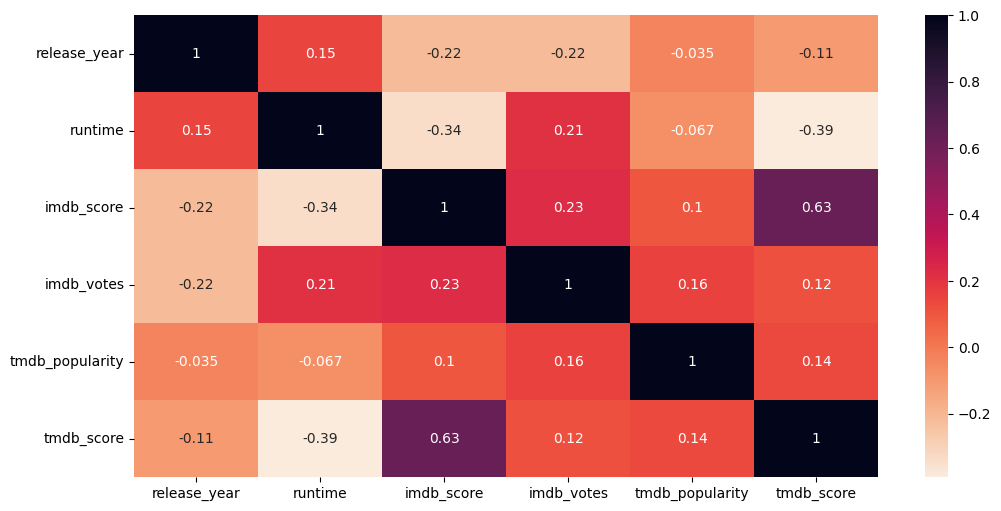

In [322]:
#EDA
plt.figure(figsize = (12, 6))
sns.heatmap(df[features].corr(), annot = True, cmap = 'rocket_r')

C:\Users\phnth\AppData\Local\Temp\ipykernel_3600\865053038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  topRatedMoviesPlot = sns.barplot(x=topRatedMovies['title'], y=topRatedMovies['imdb_score'], palette='viridis')


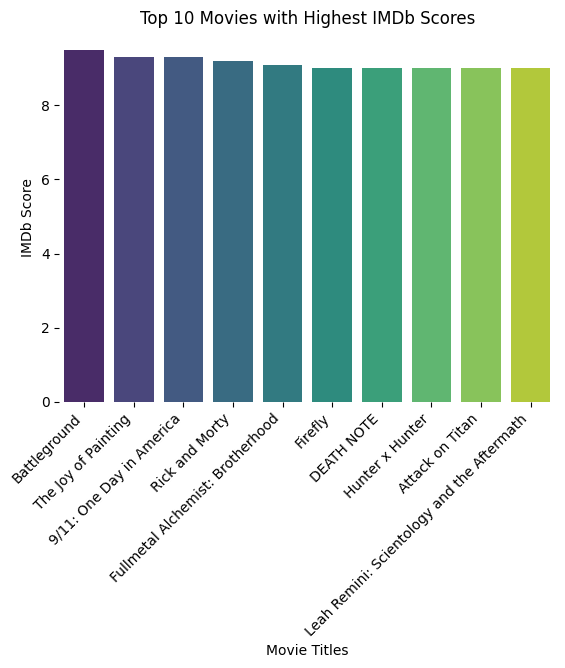

In [323]:
#EDA
#Highest IMDB score
topRatedMovies = df.nlargest(10, 'imdb_score') 
topRatedMoviesPlot = sns.barplot(x=topRatedMovies['title'], y=topRatedMovies['imdb_score'], palette='viridis')
topRatedMoviesPlot.set_xlabel('Movie Titles')
topRatedMoviesPlot.set_ylabel('IMDb Score')
topRatedMoviesPlot.set_title('Top 10 Movies with Highest IMDb Scores')
plt.xticks(rotation=45, ha='right') 
sns.despine(left=True, bottom=True)
plt.show()

<AxesSubplot: xlabel='release_year', ylabel='tmdb_popularity'>

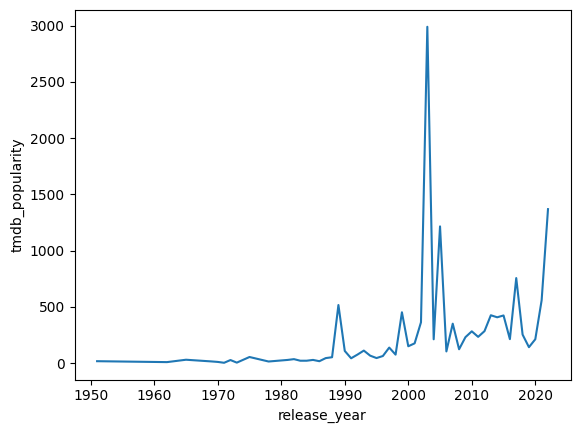

In [324]:
#EDA
popByYear = df.groupby('release_year')['tmdb_popularity'].max()
sns.lineplot(x = popByYear.index, y = popByYear)

In [343]:
#Recommendation system with Content-based and Cosine Similarity Model
#Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
#Fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(2106, 14045)

In [344]:
# Step 4: Cosine Similarity Calculation
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Step 5: Function Modification
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    results = pd.DataFrame({'title': df['title'].iloc[movie_indices], 'cosine_similarity': similarity_scores})

    return results

In [345]:
#Test recommendation system 
get_recommendations('Battleground')

,title,cosine_similarity
2172,The Wonder Years,0.107581
2299,kid 90,0.100477
456,My Wife and Kids,0.097814
1166,Pickle & Peanut,0.092072
859,The Killer Speaks,0.082975
1711,Rent-A-Pal,0.075277
1931,mixed-ish,0.074442
1741,Bless This Mess,0.074233
1437,OK K.O.! Let's Be Heroes,0.070904
1025,Fresh Off the Boat,0.070690


In [328]:
#Recommendation system with SVD
#Encoding the neccessary categorical variables
encoder = LabelEncoder()
df["title_encoded"] = encoder.fit_transform(df["title"])
df["type_encoded"] = encoder.fit_transform(df["type"])

In [329]:
#Recommendation system with SVD
#Create user-item matrix
num_users = 1
num_items = len(df)
user_item_matrix = np.zeros((num_users, num_items))

# For simplicity, let's assume all items have the same ratings for this user
ratings = np.ones(num_items)

user_item_matrix[0, :] = ratings

# Define the SVD model
embedding_dim = 10
SVDmodel = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_items, embedding_dim, input_length=num_items),
    tf.keras.layers.Reshape((embedding_dim, num_items)),
    tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1))
])

# Compile the model
SVDmodel.compile(optimizer='adam', loss='mse')

# Train the model
SVDmodel.fit(user_item_matrix, user_item_matrix, epochs=10)

# Now, you can use the learned embeddings to make recommendations
user_embedding = SVDmodel.layers[0].get_weights()[0][0]
similarities = np.dot(model.layers[0].get_weights()[0], user_embedding)

# Combine recommendations with their similarity scores
recommendations = [(df['title'].iloc[i], similarities[i]) for i in range(num_items)]

# Sort recommendations by similarity score
recommendations.sort(key=lambda x: x[1], reverse=True)

# Create a DataFrame to store the results
result = pd.DataFrame({'title': [rec[0] for rec in recommendations], 'similarities': [rec[1] for rec in recommendations]})

# Return the result DataFrame
result

Epoch 1/10
1/1 [==============================] - 1s 579ms/step - loss: 0.9751
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9732
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9712
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9692
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.9672
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.9653
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.9633
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.9614
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9594
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.9574


,title,similarities
0,Astra Lost in Space,0.006830
1,Gargantia on the Verdurous Planet,0.006794
2,Sister of the Groom,0.006649
3,Sex Ed,0.006638
4,Terriers,0.006417
...,...,...
2101,Bleak House,-0.007904
2102,Better Things,-0.008247
2103,Harmony From The Heart,-0.008346
2104,Knowing,-0.008668


In [330]:
#Recommendation system using Neural Network 
# Combine title and description into a single text column
df['text'] = df['title'] + ' ' + df['description']

# Tokenize the text data
max_words = 10000 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
word_index = tokenizer.word_index

# Pad sequences to ensure consistent length
max_sequence_length = 100  # Define the maximum sequence length
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sequences, df['imdb_score'], test_size=0.2, random_state=42)

# Define embedding dimensions
embedding_dim = 10

# Define input shape
input_shape = (max_sequence_length,)

# Define the model
NNmodel = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with linear activation for regression
])

# Compile the model
NNmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
NNmodel.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Make predictions
predictions = NNmodel.predict(X_test)

# Make predictions on the entire dataset
predictions = NNmodel.predict(sequences)

# Add a new column to the existing DataFrame 'df' for predicted ratings
df['NNpredicted_rating'] = predictions.flatten()

# Get the top N recommendations for a specific user (assuming user_index is known)
def get_top_n_recommendations(user_index, N=10):
    user_data = df.copy()  # Create a copy of the DataFrame
    user_data['user_index'] = user_index  # Add a user_index column for filtering
    user_recommendations = user_data[user_data['user_index'] == user_index]
    top_recommendations = user_recommendations.nlargest(N, 'NNpredicted_rating')
    return top_recommendations[['title', 'NNpredicted_rating']]

# Example: Get top 10 recommendations for user with index 0
user_index = 0
top_recommendations = get_top_n_recommendations(user_index=user_index, N=10)

# Print the recommendations
top_recommendations

Epoch 1/5
27/27 [==============================] - 1s 10ms/step - loss: 32.1751 - val_loss: 8.8321
Epoch 2/5
27/27 [==============================] - 0s 5ms/step - loss: 5.6531 - val_loss: 3.7800
Epoch 3/5
27/27 [==============================] - 0s 4ms/step - loss: 2.1285 - val_loss: 2.0422
Epoch 4/5
27/27 [==============================] - 0s 4ms/step - loss: 1.3345 - val_loss: 1.7075
Epoch 5/5
66/66 [==============================] - 0s 2ms/step


,title,NNpredicted_rating
1000,One-Punch Man,7.950846
1011,Dragon Ball Super,7.903436
1343,Steins;Gate 0,7.865912
2136,SPY x FAMILY,7.859829
535,Hikaru no Go,7.840917
1033,Is It Wrong to Try to Pick Up Girls in a Dungeon?,7.820225
676,Kingdom,7.777742
35,ThunderCats,7.755936
874,Nisekoi,7.752681
678,Blue Exorcist,7.744013


In [346]:
#Calculate Evaluation Metric 
#SVD model 
# Assuming 'actual_ratings' is a 1D array with actual ratings for the test set
actual_ratings = df['imdb_score'].values
SVDpredicted_ratings = np.array([rec[1] for rec in recommendations])  
rmse_svd = np.sqrt(mean_squared_error(actual_ratings, SVDpredicted_ratings))
print(f'Root Mean Squared Error (RMSE) of SVD model: {rmse_svd}')


Root Mean Squared Error (RMSE) of SVD model: 6.805309918935054
